In [2]:
import pandas as pd

# Specify the data types for the columns
dtypes = {
    'INC NUMBER': 'str',
    'OCCURRED ON': 'str',
    'OCCURRED TO': 'str',
    'UCR CRIME CATEGORY': 'str',
    '100 BLOCK ADDR': 'str',
    'ZIP': 'float',
    'PREMISE TYPE': 'str',
    'GRID': 'str'
}

# Read the CSV file with specified data types
crime_data = pd.read_csv('./Resources/Crime-data.csv', dtype=dtypes)

# Drop rows with missing 'ZIP' values
crime_data = crime_data.dropna(subset=['ZIP'])

# Remove decimal points from the 'ZIP' column
crime_data['ZIP'] = crime_data['ZIP'].astype(int)

# Display the dataframe
crime_data.head(10)

,INC NUMBER,OCCURRED ON,OCCURRED TO,UCR CRIME CATEGORY,100 BLOCK ADDR,ZIP,PREMISE TYPE,GRID
0,201700001603695,11/01/2015 00:00,03/31/2016 00:00,RAPE,38XX W CAMELBACK RD,85019,HOSPITAL,BI20
1,201700001722914,11/01/2015 00:00,NaN,LARCENY-THEFT,279XX N 23RD LN,85085,SINGLE FAMILY HOUSE,FA23
2,201500002168686,11/01/2015 00:00,11/11/2015 09:30,LARCENY-THEFT,14XX E HIGHLAND AVE,85014,PARKING LOT,BI30
3,201600000527709,11/01/2015 00:00,03/22/2016 00:36,LARCENY-THEFT,33XX W CAMELBACK RD,85017,PARKING LOT,BJ21
4,201600000052855,11/01/2015 00:00,01/09/2016 00:00,MOTOR VEHICLE THEFT,N 43RD AVE & W CACTUS RD,85029,SINGLE FAMILY HOUSE,DA19
5,201500002103724,11/01/2015 00:00,11/01/2015 15:21,DRUG OFFENSE,54XX W INDIAN SCHOOL RD,85031,APARTMENT,BH16
6,201500002102668,11/01/2015 00:00,11/01/2015 11:50,MOTOR VEHICLE THEFT,69XX W WOOD ST,85043,SINGLE FAMILY HOUSE,AF12
7,201500002101405,11/01/2015 00:00,11/01/2015 05:00,MOTOR VEHICLE THEFT,102XX W MEDLOCK AVE,85307,SINGLE FAMILY HOUSE,BJ04
8,201500002102327,11/01/2015 00:00,11/01/2015 09:00,LARCENY-THEFT,51XX N 15TH ST,85014,APARTMENT,BJ30
9,201600000594484,11/01/2015 00:00,NaN,RAPE,13XX E ALMERIA RD,85006,SINGLE FAMILY HOUSE,BD30


In [3]:
#
zip_crime_counts = crime_data['ZIP'].value_counts().head(10)

# Create a new dataframe with the top 10 ZIP codes with the most crimes
top_10_zip_crimes = pd.DataFrame({'ZIP': zip_crime_counts.index, 'Crime Count': zip_crime_counts.values})

# Display the new dataframe
top_10_zip_crimes

,ZIP,Crime Count
0,85015,28953
1,85008,27435
2,85051,25837
3,85009,25491
4,85041,24215
5,85017,22772
6,85035,21890
7,85043,20911
8,85021,19836
9,85029,18196


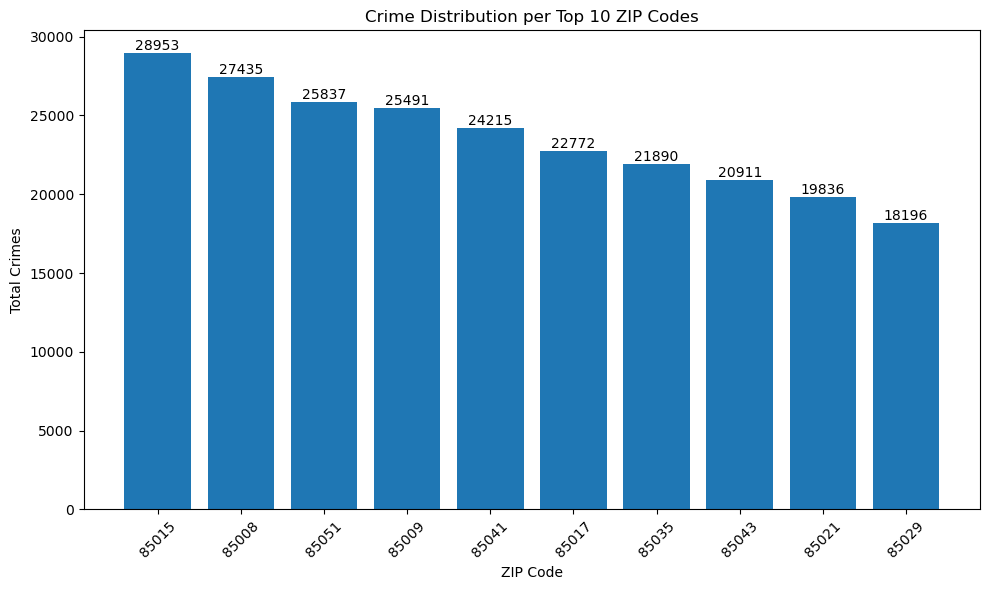

In [4]:
import matplotlib.pyplot as plt

# Create a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(top_10_zip_crimes['ZIP'].astype(str), top_10_zip_crimes['Crime Count'])

# Add the total at the top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')  

# Update layout
plt.title('Crime Distribution per Top 10 ZIP Codes')
plt.xlabel('ZIP Code')
plt.ylabel('Total Crimes')
plt.xticks(rotation=45)

# Adjust layout to ensure everything fits
plt.tight_layout()

# Save the figure
save_path = './Resources/crime_distribution_per_top10.png'
plt.savefig(save_path)

# Show the plot
plt.show()


In [5]:
import plotly.express as px

# Filter the data to include only the top 10 ZIP codes
top_10_zips = top_10_zip_crimes['ZIP'].tolist()
filtered_crime_data = crime_data[crime_data['ZIP'].isin(top_10_zips)]

# Group the data by ZIP and UCR CRIME CATEGORY and count the occurrences
crime_counts_by_zip = filtered_crime_data.groupby(['ZIP', 'UCR CRIME CATEGORY']).size().reset_index(name='Crime Count')

# Create a line chart using Plotly
fig = px.line(crime_counts_by_zip, x='UCR CRIME CATEGORY', y='Crime Count', color='ZIP', title='Types of Crimes per Top 10 ZIP Codes')
fig.update_layout(xaxis_title='Crime Category', yaxis_title='Number of Crimes')
fig.update_traces(mode='lines+markers')
# Show the plot
fig.show()

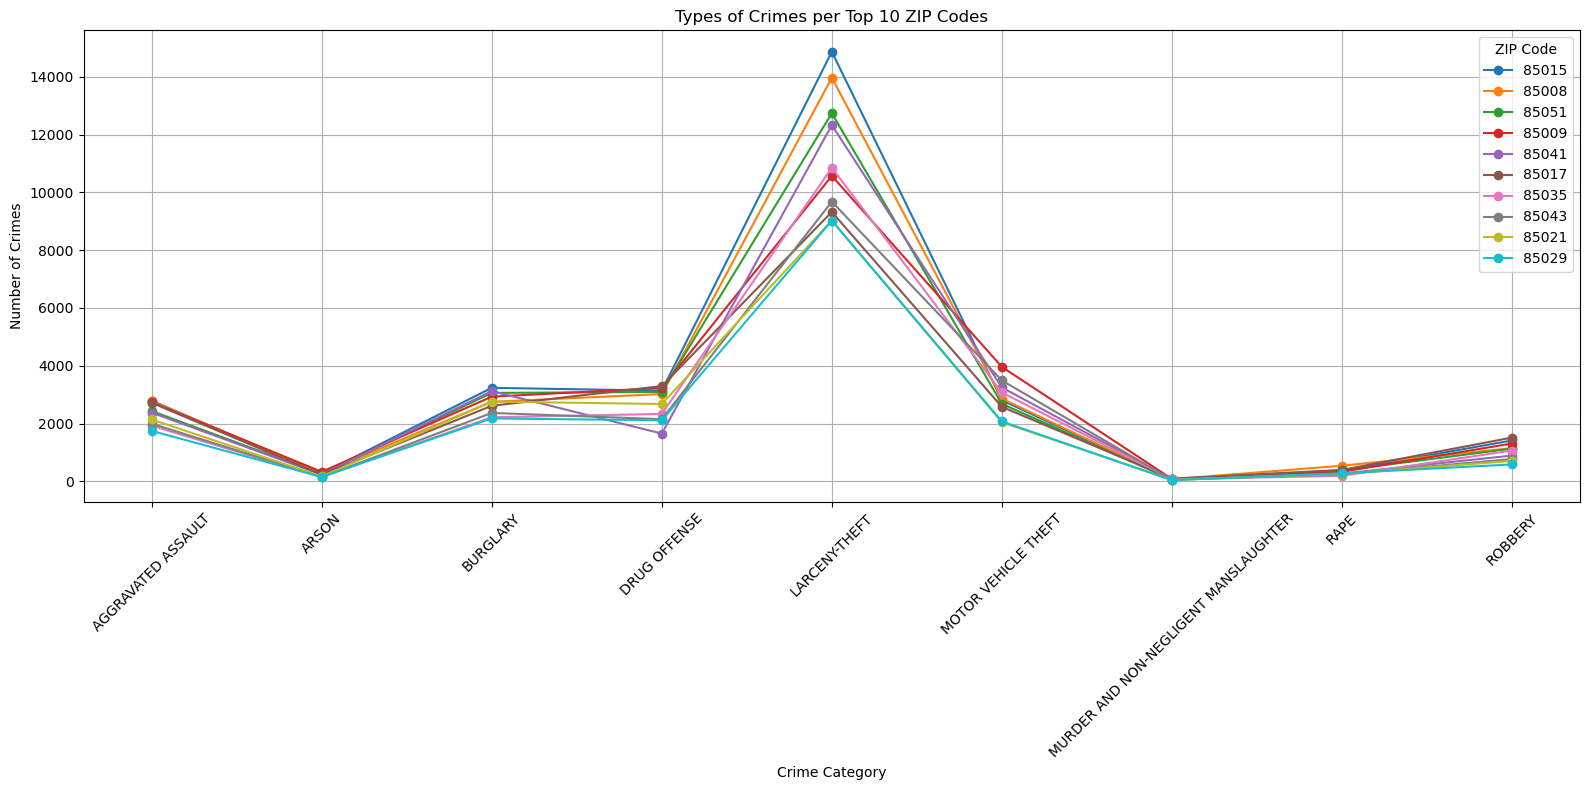

In [6]:
import matplotlib.pyplot as plt

# Create a figure and axis with increased width
plt.figure(figsize=(16, 8))

# Plot each ZIP code's crime counts by category
for zip_code in top_10_zips:
    zip_data = crime_counts_by_zip[crime_counts_by_zip['ZIP'] == zip_code]
    plt.plot(zip_data['UCR CRIME CATEGORY'], zip_data['Crime Count'], marker='o', label=str(zip_code))

# Add labels and title
plt.title('Types of Crimes per Top 10 ZIP Codes')
plt.xlabel('Crime Category')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.legend(title='ZIP Code')
plt.grid(True)
plt.tight_layout()

# Save the figure
save_path = './Resources/crime_types_per_top10.png'
plt.savefig(save_path)

# Show the plot
plt.show()